# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

### Understanding the structure of the data

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT-Foundations-for-Data-Science/FoodHub/foodhub_order.csv')
# return the first 5 rows
df.head()

Mounted at /content/drive


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Print nbr of rows, cols
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [6]:
#Check for duplicate order_ids...
df.duplicated(['order_id']).sum()

0

#### Observations:

There are nine columns in the dataset:
- (4) int64
- (4) string objects
- (1) float64

There are 1898 orders in the data set.  All of the order_ids are unique.  

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
#Check for null values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [8]:
# Checking missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [33]:
# Making a list of all categorical variables
cat_col = ['customer_id','restaurant_name', 'cuisine_type','day_of_the_week','rating']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())

    print('-' * 50)

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
103500     1
62980      1
76686      1
63141      1
230535     1
Name: count, Length: 1200, dtype: int64
--------------------------------------------------
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Anjappar Chettinad             1
'wichcraft                     1
Chote Nawab                    1
Hunan Manor                    1
Sushi Choshi                   1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish 

In [10]:
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


In [11]:
# What percentage of orders do not have ratings?
nonrated = int(df.describe(exclude = 'number').T['freq']['rating'])
total = int(df.describe(exclude = 'number').T['count']['rating'])
print("Number of unrated orders: %.2f%%" % float((nonrated/total)*100))

Number of unrated orders: 38.78%


#### Observations:
There are no Null or N/A values in the entire data set.  However, out of 1898 orders, 736 (~39%) were not given a rating.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [13]:
import datetime
tdelta = datetime.timedelta(seconds=(2.737197e+01*60))
print(tdelta)


0:27:22.318200


#### Observations:
The minumum food preparation time is 20 min.  The maximum is 35 min and the average (mean) is 27 min 22 sec.

### **Question 5:** How many orders are not rated? [1 mark]

In [14]:
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:
However, out of 1898 orders, 736 (~39%) were not given a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

restaurant_name
Shake Shack                              219
The Meatball Shop                        132
Blue Ribbon Sushi                        119
Blue Ribbon Fried Chicken                 96
Parm                                      68
RedFarm Broadway                          59
RedFarm Hudson                            55
TAO                                       49
Han Dynasty                               46
Blue Ribbon Sushi Bar & Grill             44
Nobu Next Door                            42
Sushi of Gari 46                          37
Rubirosa                                  37
Momoya                                    30
Blue Ribbon Sushi Izakaya                 29
Five Guys Burgers and Fries               29
Tamarind TriBeCa                          27
Bareburger                                27
Jack's Wife Freda                         25
Sushi of Gari Tribeca                     24
Chipotle Mexican Grill $1.99 Delivery     23
ilili Restaurant                       

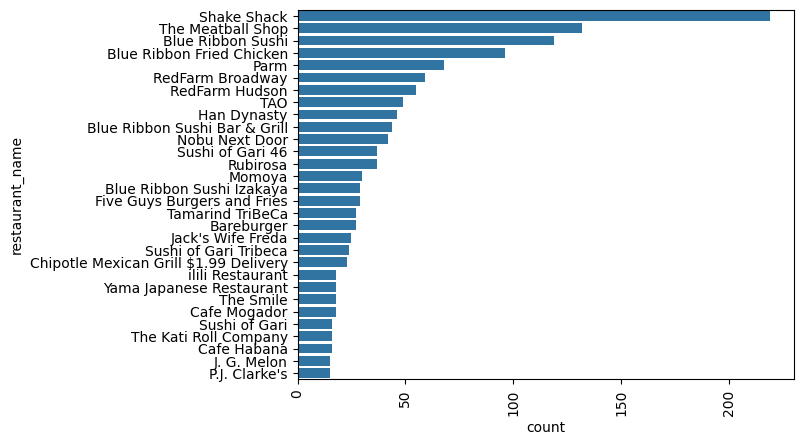

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


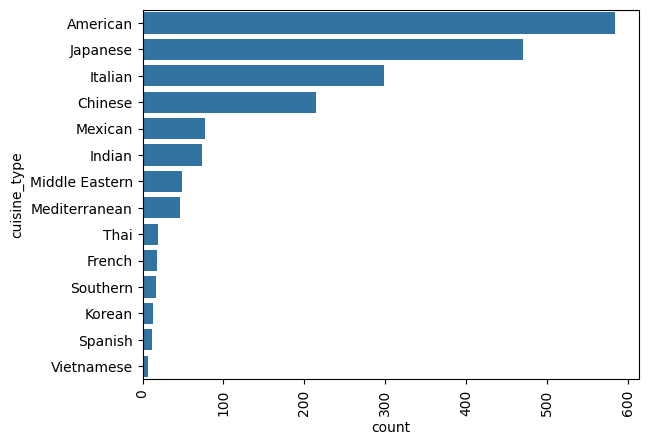

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


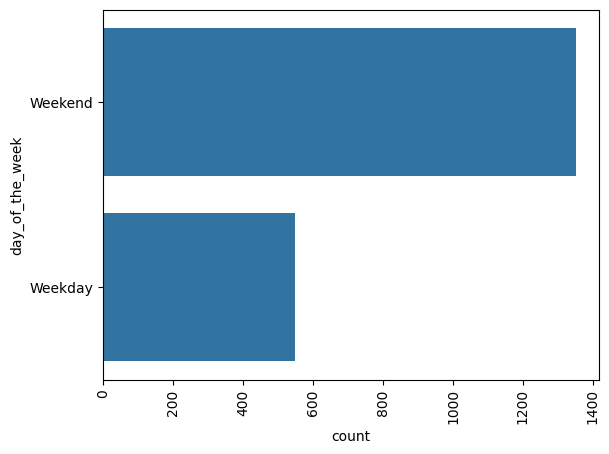

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


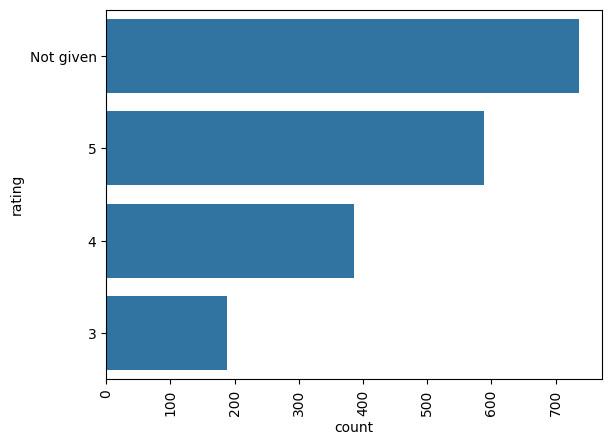

cost_of_the_order
12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
14.26     1
34.19     1
13.77     1
13.63     1
4.47      1
Name: count, Length: 312, dtype: int64
Mean value: 16.498851422550054


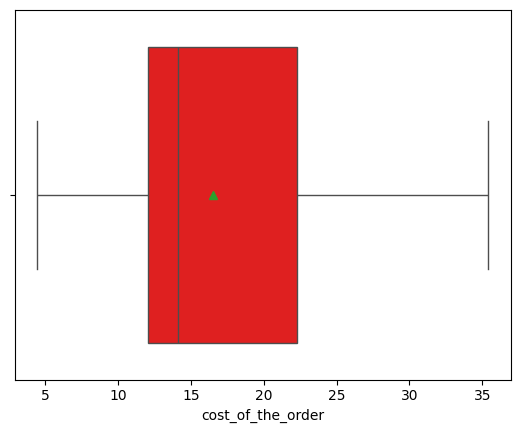

food_preparation_time
21    135
27    123
23    123
22    123
28    121
24    121
30    119
20    119
33    118
35    117
31    116
26    115
34    113
32    113
25    113
29    109
Name: count, dtype: int64
Mean value: 27.371970495258168


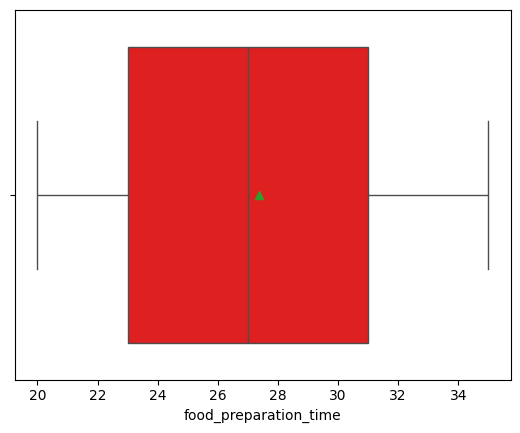

delivery_time
24    162
29    148
28    148
26    141
27    138
30    133
25    120
16     90
19     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: count, dtype: int64
Mean value: 24.161749209694417


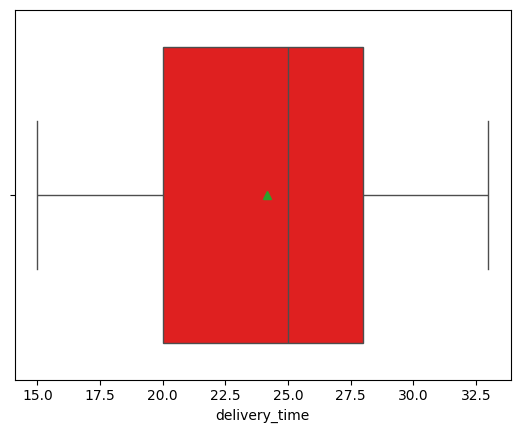

In [15]:

def do_countplots(cols, n):
  '''
  Display a countplot for each column in the list.  Limit the number of
  countplots to n values.
  '''
  dfcopy = df.copy()

  # Printing number of count of each unique value in each column
  for column in cols:
    dfcopy.sort_values(by=column, ascending=False, inplace=True)
    dfcopy.value_counts().iloc[:n].index.tolist()
    print(dfcopy[column].value_counts().iloc[:n])

    sns.countplot(dfcopy[column], order=dfcopy[column].value_counts().iloc[:n].index)
    plt.xticks(rotation=90)
    plt.show()

def do_boxplots(cols, n, figsize=(15, 10), bins="auto"):
  '''
  Display a boxplot for each column in the list.  Limit the number of
  boxplots to n values.
  '''
  dfcopy = df.copy()

  # Printing number of count of each unique value in each column
  for column in cols:
    dfcopy.sort_values(by=column, ascending=False, inplace=True)
    dfcopy.value_counts().iloc[:n].index.tolist()
    print(dfcopy[column].value_counts().iloc[:n])

    # Calculate the mean
    mean_value = dfcopy[column].astype(float).mean()

    # Print the mean rating
    print(f"Mean value: {mean_value}")

    sns.boxplot(x=dfcopy[column], showmeans=True, color='red')
    plt.show()

# Making a list of all categorical variables
cat_col = ['restaurant_name', 'cuisine_type','day_of_the_week',
           'rating']
do_countplots(cat_col, 30)

cat_col = ['cost_of_the_order', 'food_preparation_time','delivery_time']
do_boxplots(cat_col, 2000)


Mean rating: 4.344234079173838


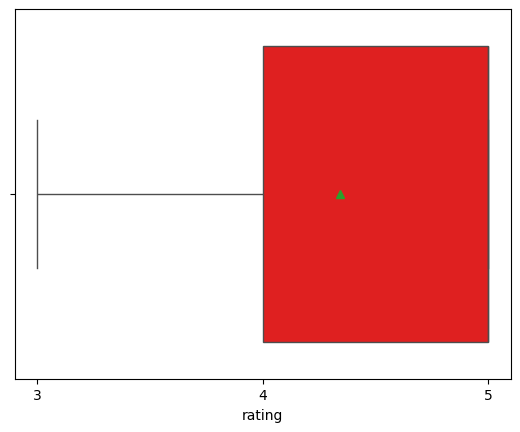

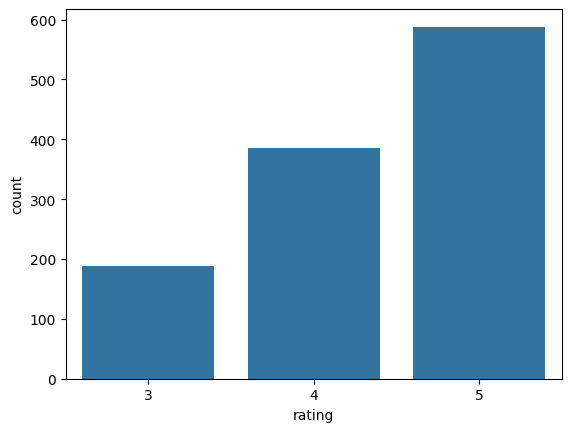

In [16]:
# Display a boxplot of the ratings however, filter out the "Not given" ratings
dfcopy = df.copy()

# Drop rows where rating is "Not given"
dfcopy = dfcopy[dfcopy['rating'] != 'Not given']

# Calculate the mean rating after filtering out "Not given" ratings
mean_rating = dfcopy['rating'].astype(float).mean()

# Print the mean rating
print(f"Mean rating: {mean_rating}")

# Show the rating distribution in a box chart
dfcopy = dfcopy.sort_values(by='rating')
sns.boxplot(x=dfcopy['rating'], showmeans=True, color='red')
plt.show()
print()

# Show the rating distribution in a bar chart
sns.countplot(x=dfcopy['rating'])
plt.show()

In [31]:
# Print the percentages of orders placed on the weekend vs during the week.
print(df['day_of_the_week'].value_counts(normalize=True))

day_of_the_week
Weekend    0.711802
Weekday    0.288198
Name: proportion, dtype: float64


In [34]:
# Print the percentages of orders ratings.
print(df['rating'].value_counts(normalize=True))

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64


**Observations**


1.   Order IDs are all unique
2.   Customer ID are dstributed quite widely.  The most frequent customer has only 13 orders.
3.   Restaurants are also fairly widely distributed however some are much more commonly used than others.  Shake Shack is most common.
4.   There are nine different cuisine types represented.  American and Japanese are the top two.
5.   Cost of an order ranges arong $5 to $35 with a mean of $16.50. The data is only slightly right skewed.
6.   71% of the orders are made on weekends.
7.   39% of the orders were not rated. Of the orders that were rated, the mean is 4.3 out of 5.
8.   Foof preparation time varies from ~20 min to ~35 min with a mean of of ~27 min.
9.   Delivery times vary from ~20 min to ~28 min with a mean of ~24 min.




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


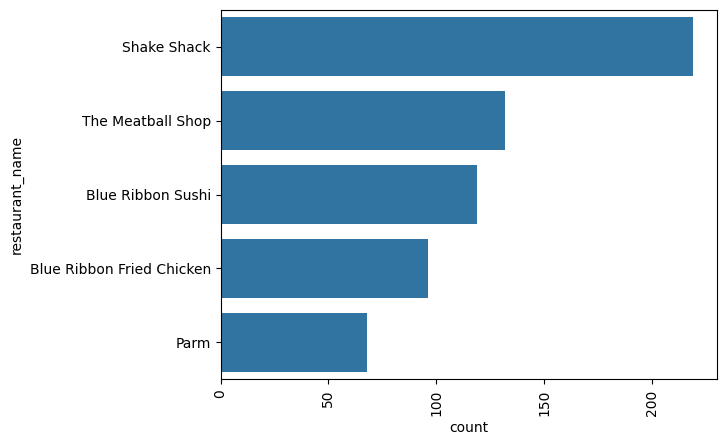

In [17]:
do_countplots(['restaurant_name'], 5)

#### Observations:
There are 178 different resaurants that received orders, the top 5 are:

1.   Shake Shack                  219
2.   The Meatball Shop            132
3.   Blue Ribbon Sushi            119
4.   Blue Ribbon Fried Chicken     96
5.   Parm                          68

There are more than double the number of orders on weekends than during the week (1351 vs 547).

Of the 14 different cuisines, the top four are:

1.   American          584
2.   Japanese          470
3.   Italian           298
4.   Chinese           215

The average cost of an order is $16.50.

The average food prep time is 27.37 minutes.

The average delivery time is 24.16 minutes.

The most prevelant rating is "Not given" (736) but of the orders given a rating, the median rating is 4.34 out of 5.













### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

<Axes: xlabel='cuisine_type', ylabel='count'>

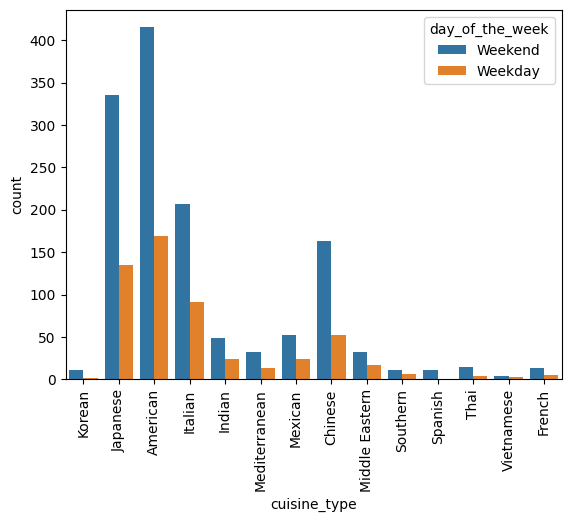

In [18]:

## Display a count plot for all the cuisine types.  Break the distribution
## out by day of week.
df.sort_values(by=column, ascending=False, inplace=True)
df.value_counts().index.tolist()
plt.xticks(rotation=90)
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')


#### Observations:
The most popular cuisine on weekends is also the most popular cuisine in general which is "American".


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

29.24% of orders cost more than 20 dollars


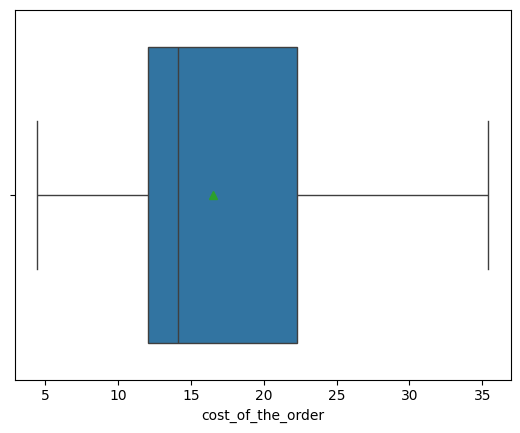

In [19]:
sns.boxplot(data=df, x='cost_of_the_order', showmeans=True);

# Calculate the percentage of orders that cost more than 20 dollars
percentage = (len(df[df['cost_of_the_order'] > 20])) / (len(df)) * 100

# Print the percentage
print(f'{percentage:.2f}% of orders cost more than 20 dollars')

#### Observations:
29.24% of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

delivery_time
24    162
29    148
28    148
26    141
27    138
30    133
25    120
16     90
19     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: count, dtype: int64
Mean value: 24.161749209694417


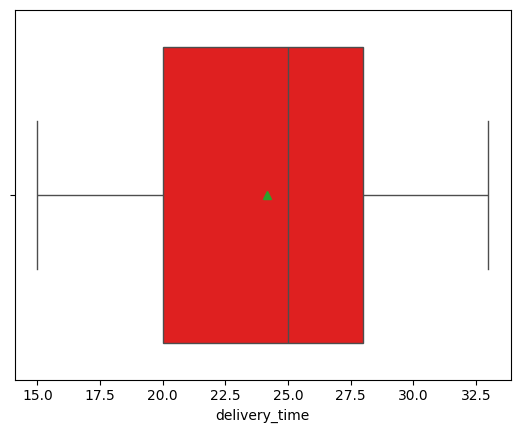

In [20]:
cat_col = ['delivery_time']
do_boxplots(cat_col, 2000)



#### Observations:
The mean delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
customer_orders = df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)
print(customer_orders.head(3))


customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


#### Observations:
The top three customers (along with number of orders) are:

1.  52832                (13)
2.  47440                (10)
3.  83287                (9)


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


First, let's see if there is any relationship between day of the week, cuisine type and rating (if given) and cost of the order, food prep time and delivery time respectively.

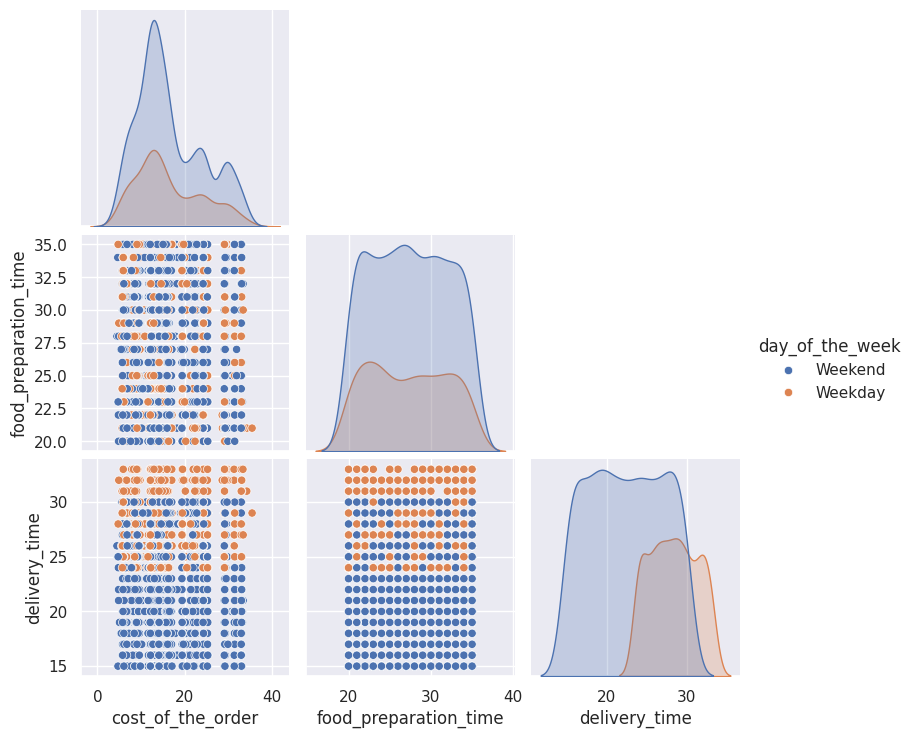

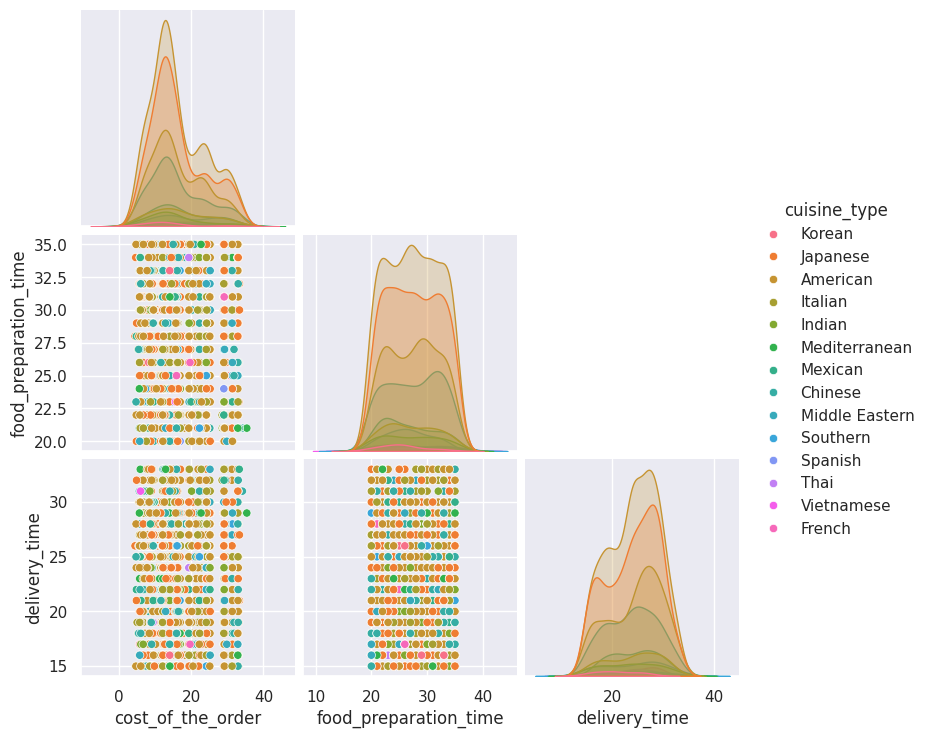

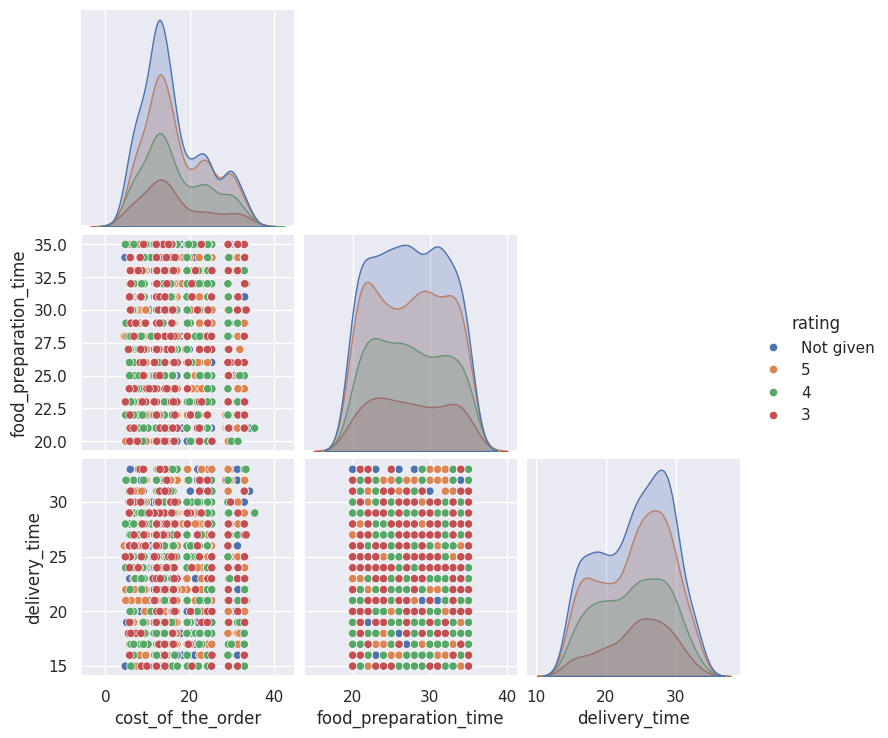

In [22]:
sns.set(style="darkgrid")
for hueval in ['day_of_the_week','cuisine_type','rating']:
  sns.pairplot(data=df, vars=['cost_of_the_order','food_preparation_time','delivery_time'],
             corner=True, hue=hueval);
  plt.show()

Looks like there is not much of a relationship between food preparation time, delivery time, cost of the order, cuisine type and rating.  It looks like the only thing that varies food preparation and delivery times is day of the week.

What about these "Not given" ratings?  Do we see any particular reason why this is happening in the other variables?

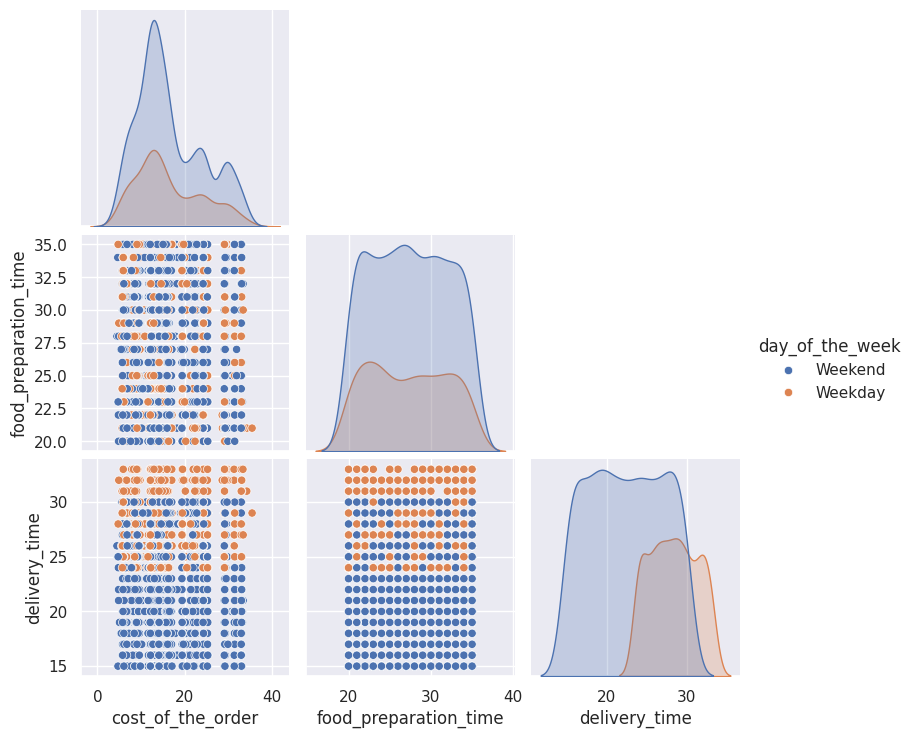

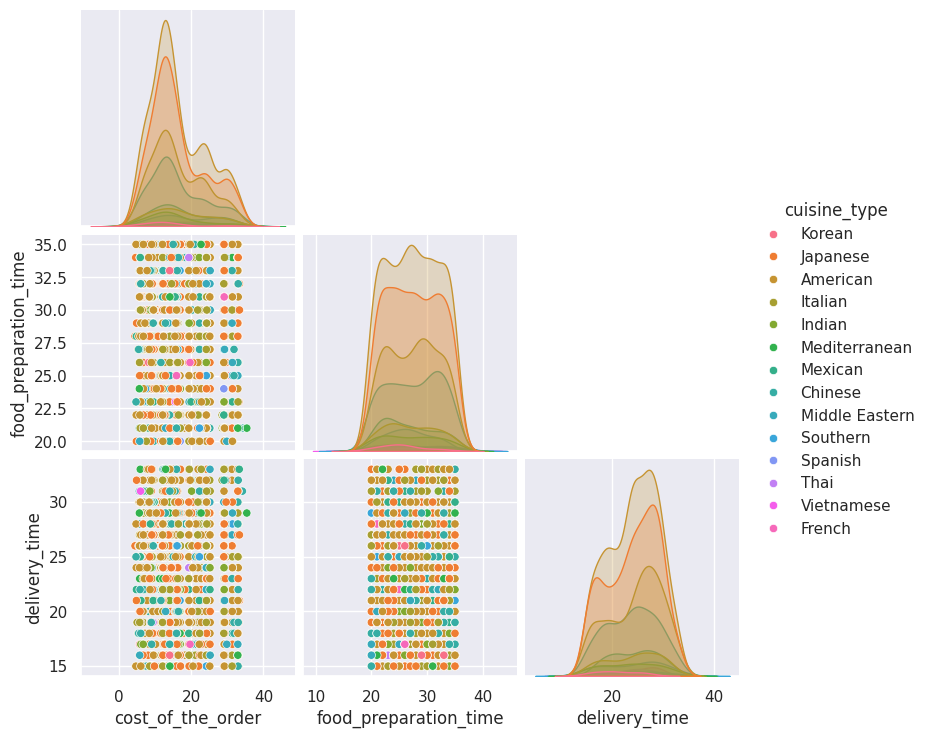

In [23]:
dfcopy = df.copy()
dfcopy = dfcopy[dfcopy['rating'] == 'Not given']

for hueval in ['day_of_the_week','cuisine_type']:
  sns.pairplot(data=df, vars=['cost_of_the_order','food_preparation_time','delivery_time'],
             corner=True, hue=hueval);
  plt.show()

Hmmm....  We can't seem to know exactly why customers don't give ratings.  It seems pretty random.

So given that, who are the the customers that give the most and highest ratings respectively?

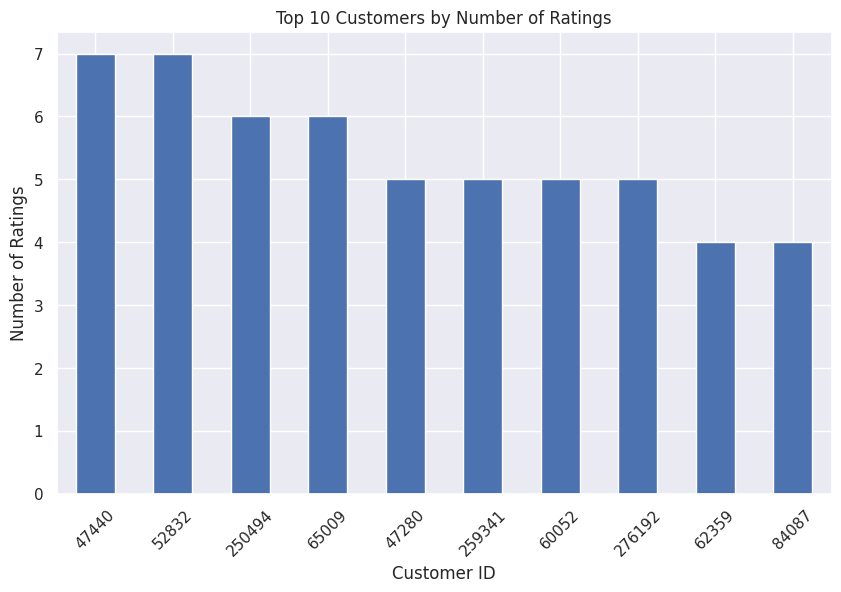

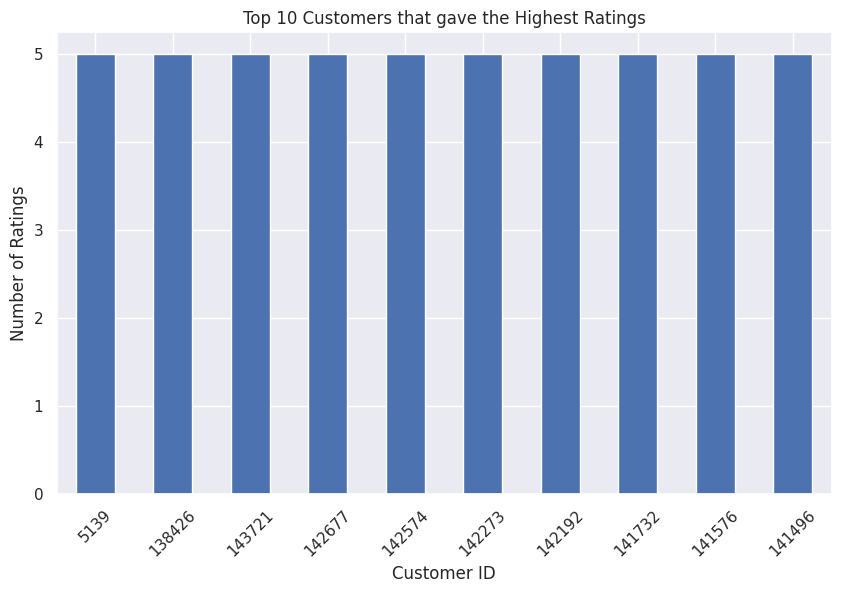

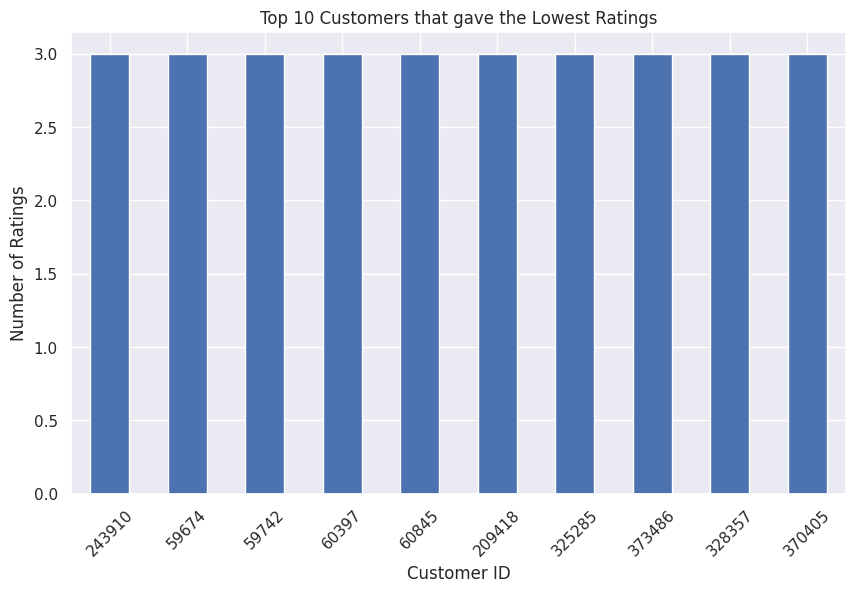

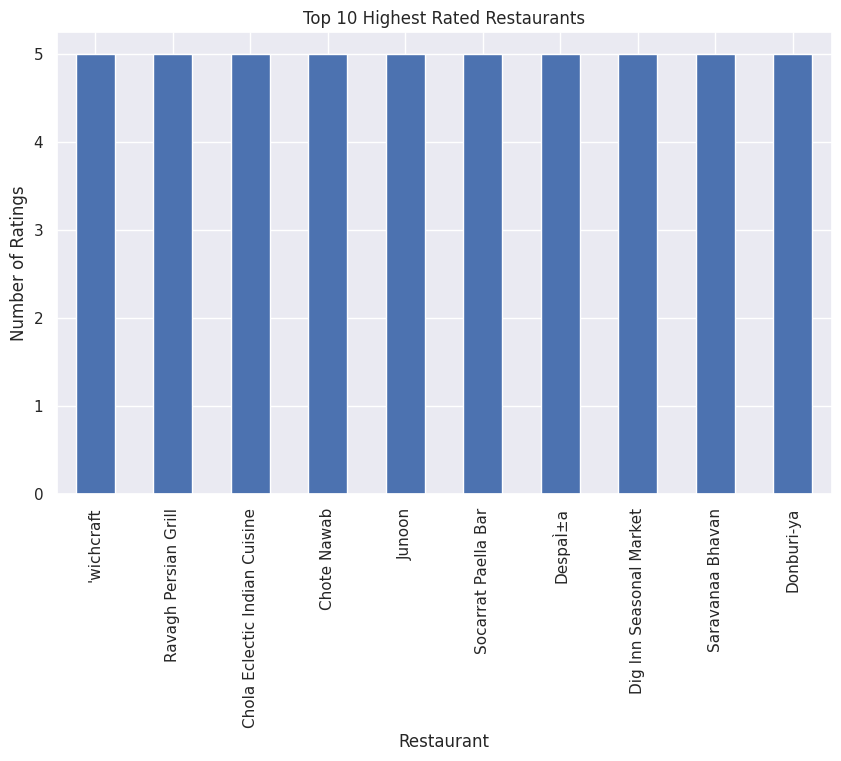

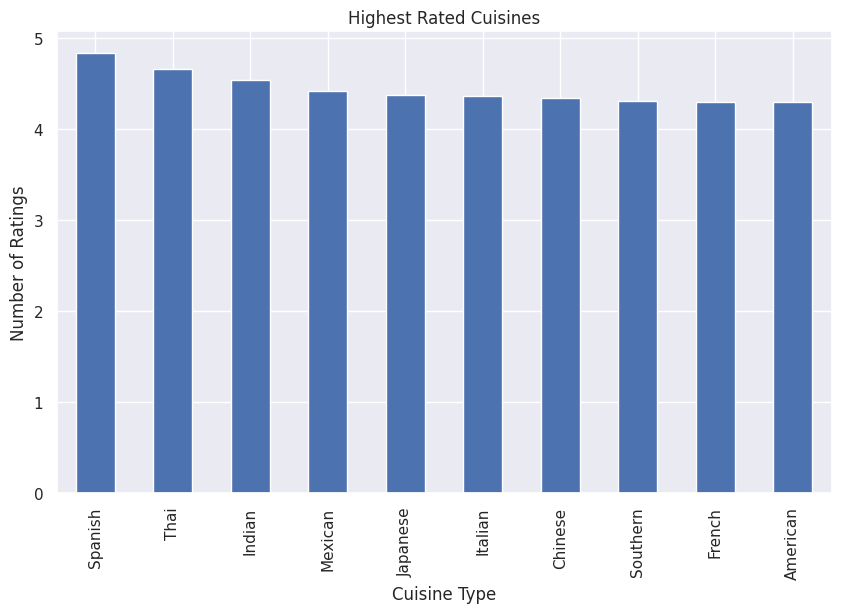

In [24]:
dfcopy = df.copy()
dfcopy = dfcopy[dfcopy['rating'] != 'Not given']
dfcopy['rating'] = pd.to_numeric(dfcopy['rating'], errors='coerce')

# Plot the top ten customers that give the most ratings
customer_orders = dfcopy.groupby('customer_id')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
customer_orders.head(10).plot(kind='bar')
plt.title('Top 10 Customers by Number of Ratings')
plt.xlabel('Customer ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)  # Rotate customer IDs for readability
plt.show()
print()

# Plot the top ten customers that give the highest ratings
customer_orders = dfcopy.groupby('customer_id')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
customer_orders.head(10).plot(kind='bar')
plt.title('Top 10 Customers that gave the Highest Ratings')
plt.xlabel('Customer ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)  # Rotate customer IDs for readability
plt.show()
print()

# Plot the top ten customers that give the lowest ratings
customer_orders = dfcopy.groupby('customer_id')['rating'].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
customer_orders.head(10).plot(kind='bar')
plt.title('Top 10 Customers that gave the Lowest Ratings')
plt.xlabel('Customer ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)  # Rotate customer IDs for readability
plt.show()
print()

# Plot the highest rated restaurants
customer_orders = dfcopy.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
customer_orders.head(10).plot(kind='bar')
plt.title('Top 10 Highest Rated Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)  # Rotate customer IDs for readability
plt.show()
print()

# Plot the highest rated cuisine types
customer_orders = dfcopy.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
customer_orders.head(10).plot(kind='bar')
plt.title('Highest Rated Cuisines')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)  # Rotate customer IDs for readability
plt.show()
print()

<Axes: >

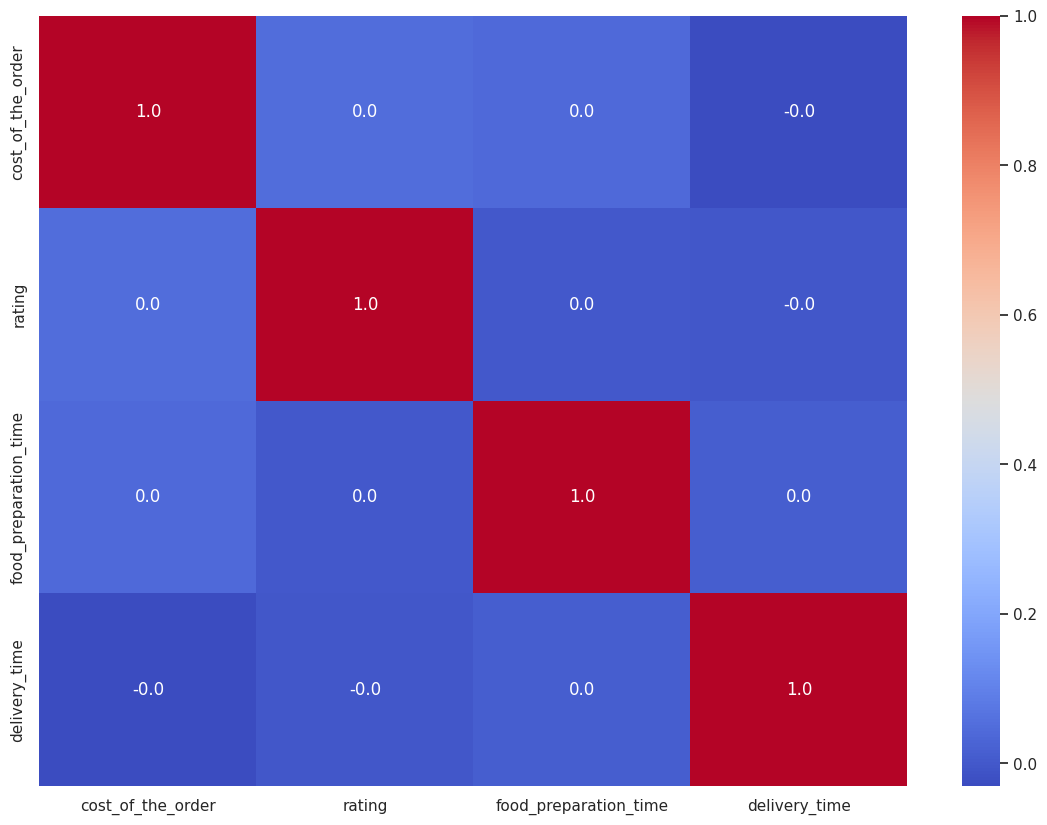

In [27]:
# Check for correlation among numerical variables.  In oder to do this, let's
# convert the ratings to float and deal with this "Not given" problem by
# setting these to 0.0 so we can include rating in a heatmap.

# First, make a copy of the data.
dfcopy = df.copy()

# Convert ratings of "Not given" to zero for the purpose of this thought
# experiment.  Remember we are only changing the copy of the data, not the
# original.
dfcopy['rating'] = dfcopy['rating'].replace('Not given', '0.0').astype(float)

num_var = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
corr = dfcopy[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".1f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

<Axes: xlabel='cuisine_type', ylabel='count'>

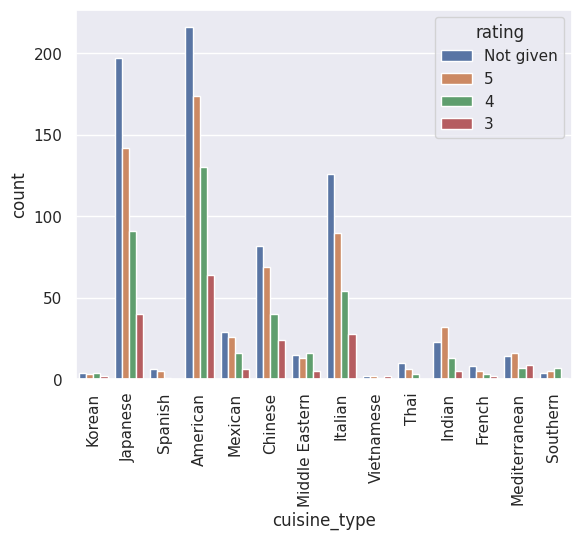

In [35]:
## Display a count plot for all the cuisine types.  Break the distribution
## out by rating.
df.sort_values(by=column, ascending=False, inplace=True)
df.value_counts().index.tolist()
plt.xticks(rotation=90)
sns.countplot(data=df, x='cuisine_type', hue='rating')

**Conclusion:**

Even after converting the "Not given" ratings, we still see no correlations in the numeric data - including rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [28]:
# Filter out "Not given" ratings and convert to numeric
dfcopy = df.copy()
dfcopy = dfcopy[dfcopy['rating'] != 'Not given']
dfcopy['rating'] = pd.to_numeric(dfcopy['rating'], errors='coerce')

# Group by restaurant name and calculate the average rating.  Filter out
# the resaurants that have a rating <= 4.
average_ratings = dfcopy.groupby('restaurant_name')['rating'].mean()
average_ratings = average_ratings[average_ratings.copy(deep=True) > 4]

# Count the number of ratings for each restaurant
rating_counts = dfcopy.groupby('restaurant_name')['rating'].count()

# Filter restaurants with at least 50 ratings
filtered_ratings = average_ratings[rating_counts > 50]

# Print the top 30 restaurants with the highest average rating
print(filtered_ratings.sort_values(ascending=False))



restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64


#### Observations:
There are only four restaurants that meet the criteria of having greater than 50 ratings and an average rating > 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [27]:
dfcopy = df.copy()

# Collect revenue for orders > $20...
bucket25 = dfcopy[dfcopy['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25
# Collect revenue for orders > $5...
bucket15 = dfcopy[dfcopy['cost_of_the_order'] > 5]['cost_of_the_order'] * 0.15
net_revenue = bucket25 + bucket15
net_income = dfcopy['cost_of_the_order'].sum()

print("Total cost or all orders is: $%.2f" % net_income)
print("Total revenue is: $%.2f" % net_revenue.sum())
print("Total net revenue is: $%.2f, %.2f%% percent of total gross income." %
      (net_revenue.sum(), (net_revenue.sum()/net_income)*100))





Total cost or all orders is: $31314.82
Total revenue is: $5901.96
Total net revenue is: $5901.96, 18.85% percent of total gross income.


#### Observations:
Total net revenue is: $5901.96, 18.85% percent of total net income.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

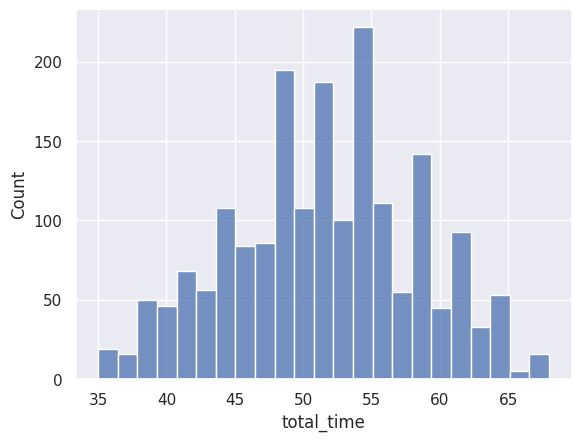

10.54% of orders take more than 60 minutes to get delivered.


In [51]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
sns.histplot(data=df,x='total_time')
plt.show()

# Calculate the percentage of orders that take more than 60 minutes.
percentage = (df['food_preparation_time'] + df['delivery_time'] > 60).mean() * 100
print(f'{percentage:.2f}% of orders take more than 60 minutes to get delivered.')

#### Observations:
10.54% of orders take more than 60 minutes to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

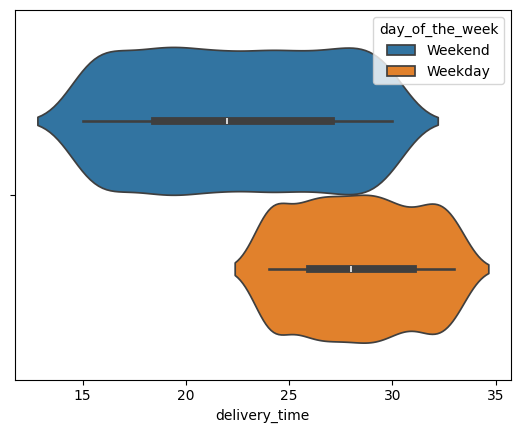

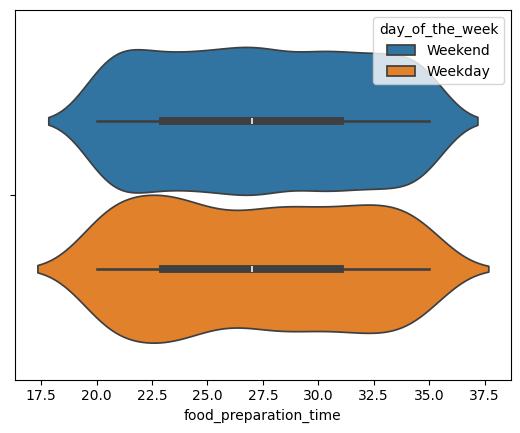

In [45]:
sns.violinplot(data=df,x='delivery_time', hue='day_of_the_week')
plt.show()
sns.violinplot(data=df,x='food_preparation_time', hue='day_of_the_week')
plt.show()

#### Observations:
The mean delivery time is noticeably higher (~5 min) during the week verses the weekend.  Delivery times seem more predictable during the week.  This is perhaps due to higher traffic patterns during the week.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Weekends are 71% busier than Weekdays.
*  39% of orders a unrated.  There doesn't seem to be a definative reason why (e.g. cost, delivery time, cuisine type, restaurant).  The mean rating is 4.34 and no one gave a rating < 3.
*  American and Japanese are the most popular cuisines.

### Recommendations:


*  There is a large disparity in the number of orders on weekends vs. during the week.  So how could we increase service usage during the week?  Perhaps we could offer a discount or offer coupons during the week.
*  Only 29% of orders cost more than \$20 dollars.  How could we get people to use the service to make larger orders?  Perhaps a 10% discount on orders larger than $50 or a "Feed the family" discount could improve usage.
*  Perhaps a loyalty program could offer discounts after a customer uses the service more than 5 times.
*  We need do do some further analysis regarding the distribution of cuisine types in the general population of restaurants.  It is hard to believe American and Japanese are the dominant cuisine types.  How could we exapnd usage of other cuisine types (e.g. Italian and Mexican).
*  Given that there are no rating lower than 3 and the median in 4.3, it seems they are very happy with the service.  Perhaps there is pent up demand.  Therefore we should increase our advertising budget.
*  How could we get more resaurants to push patrons to use the service?  An advertising promotion deal with the resaurants may incentivize restaurants  that meet a service criteia (e.g. rating, quantity) to encourage the use if the service.


---